In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
#read in short term rental data
st_rentals = pd.read_csv(r"C:\Users\brand\Documents\DA8\Projects\capstone_nashville_da8\data\Residential_Short_Term_Rental_Permits (1).csv")

In [4]:
st_rentals.head()

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,2022028676,"WOLF, BRIAN & ANNA MECHLING","WOLF, BRIAN & ANNA MECHLING",Short Term Rental � Multifamily,ISSUED,091024Y30300CO,04/29/2022 12:00:00 AM,06/03/2022 12:00:00 AM,06/03/2024 12:00:00 AM,5403 CENTENNIAL BLVD 303,...,3609 CALDWELL CT,NaN,NASHVILLE,TN,37204,CASR,CAZ10A003,20.0,37013300,"5403 CENTENNIAL BLVD 303\nNASHVILLE, TN 37209\..."
2,201526366,"Uhl, Thomas W. & Juanita M.",Nieves Uhl,Short Term Rental - Non-Owner Occupied,ISSUED,07301018000,06/24/2015 12:00:00 AM,06/24/2015 12:00:00 AM,06/24/2024 12:00:00 AM,2404 MILTON DR,...,5 Caminito De Montoya,NaN,Santa Fe,NM,87504,CASR,CAZ10A002,7.0,37011500,"2404 MILTON DR\nNASHVILLE, TN 37216\n(36.21023..."
3,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,07/07/2015 12:00:00 AM,07/07/2015 12:00:00 AM,07/07/2023 12:00:00 AM,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
4,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,07/01/2021 12:00:00 AM,08/10/2021 12:00:00 AM,08/10/2023 12:00:00 AM,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."


In [8]:
issued_properties = st_rentals[st_rentals['Permit Status'] == 'ISSUED']
property_counts = issued_properties.groupby('ZIP').size()

In [9]:
print(property_counts)

ZIP
37013      28
37027       5
37064       1
37072      16
37076      40
37080       7
37115      96
37122       1
37138      21
37143       3
37189      15
37201     374
37203    1573
37204     189
37205      52
37206     725
37207     590
37208     688
37209     438
37210     285
37211     169
37212     623
37213       1
37214     161
37215      28
37216     336
37217     109
37218      76
37219      69
37220       7
37221      23
dtype: int64


In [10]:
top_ten = property_counts.nlargest(10)

In [11]:
top_ten

ZIP
37203    1573
37206     725
37208     688
37212     623
37207     590
37209     438
37201     374
37216     336
37210     285
37204     189
dtype: int64

In [17]:
top_ten = property_counts.nlargest(10).rename('count')

In [12]:
#load the zip geojson
zip_codes_geojson = gpd.read_file(r"C:\Users\brand\Documents\DA8\Projects\capstone_nashville_da8\data\Zip Codes (1).geojson")

In [13]:
print(zip_codes_geojson.head())

  zipcode          poname  created_date objectid  \
0   37015    ASHLAND CITY           NaN       21   
1   37143          PEGRAM           NaN       23   
2   37072  GOODLETTSVILLE           NaN       46   
3   37189    WHITES CREEK           NaN       50   
4   37015    ASHLAND CITY           NaN       20   

                                 globalid  created_user  last_edited_date  \
0  {2AB8F204-63EE-49A4-A806-8E1DAE1C32AA}           NaN               NaN   
1  {B142BE7A-6E4F-4325-95C5-A1C980D46F37}           NaN               NaN   
2  {FD866D5C-A196-4C6E-9CFF-A04FD08B1657}           NaN               NaN   
3  {AD8029C0-DF92-4103-B4DF-A67EF4F502E1}           NaN               NaN   
4  {49D81E1C-5F08-414E-AED7-8C8F9714DD83}           NaN               NaN   

   last_edited_user                                           geometry  
0               NaN  MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ...  
1               NaN  MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ...  
2    

In [14]:
# Merge data based on ZIP code
merged_data = zip_codes_geojson.merge(property_counts, left_on='zipcode', right_index=True, how='left')

# Filter the top ten ZIP codes
top_ten = merged_data.nlargest(10, 'count')

# Plot the top ten ZIP codes
top_ten.plot(column='count', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Top Ten ZIP Codes with Highest Number of Issued Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: Cannot merge a Series without a name

In [19]:
print(zip_codes_geojson['zipcode'].dtype)
print(top_ten.index.dtype)

object
int64


In [21]:
zip_codes_geojson['zipcode'] = zip_codes_geojson['zipcode'].astype(int)

In [22]:
# Merge data based on ZIP code
merged_data = zip_codes_geojson.merge(top_ten, left_on='zipcode', right_index=True, how='left')

In [31]:
print(merged_data)

    zipcode          poname  created_date objectid  \
0     37015    ASHLAND CITY           NaN       21   
1     37143          PEGRAM           NaN       23   
2     37072  GOODLETTSVILLE           NaN       46   
3     37189    WHITES CREEK           NaN       50   
4     37015    ASHLAND CITY           NaN       20   
5     37122    MOUNT JULIET           NaN       40   
6     37143          PEGRAM           NaN       24   
7     37027       BRENTWOOD           NaN       27   
8     37240       NASHVILLE           NaN       36   
9     37218       NASHVILLE           NaN       55   
10    37080         JOELTON           NaN       32   
11    37027       BRENTWOOD           NaN       44   
12    37086       LA VERGNE           NaN        5   
13    37152        RIDGETOP           NaN       19   
14    37210       NASHVILLE           NaN       12   
15    37207       NASHVILLE           NaN       48   
16    37221       NASHVILLE           NaN       17   
17    37219       NASHVILLE 

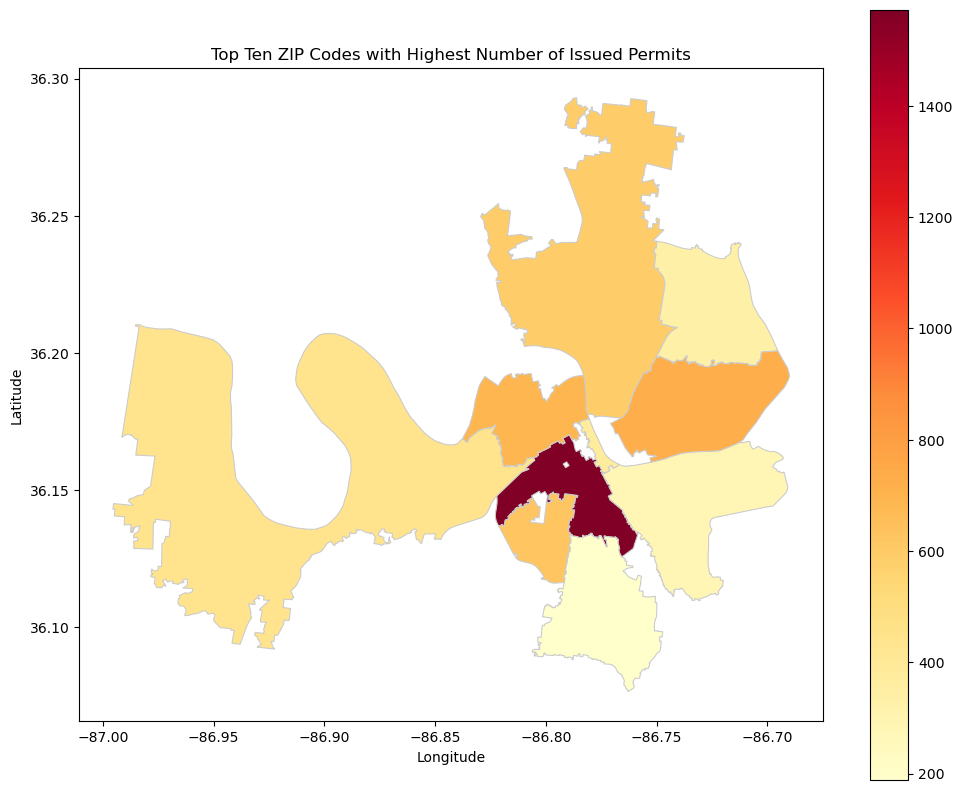

In [23]:
#plot
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Top Ten ZIP Codes with Highest Number of Issued Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

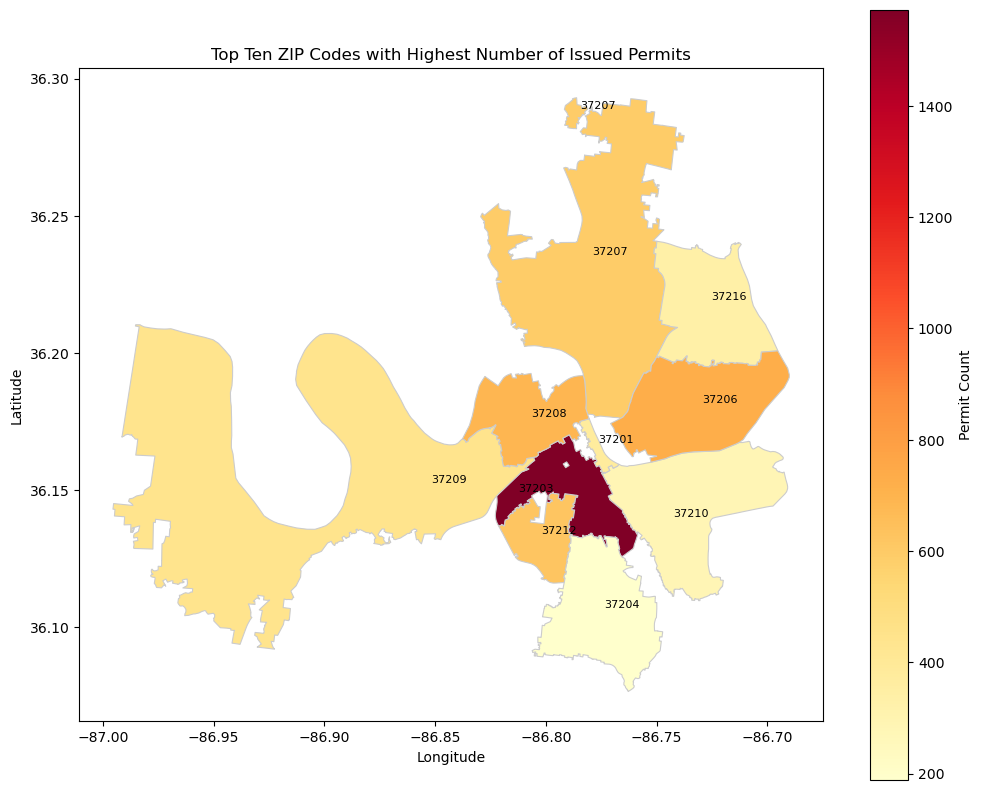

In [35]:
import matplotlib.colors as colors

#plot
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

#label
merged_data['coords'] = merged_data['geometry'].representative_point()
for idx, row in merged_data.iterrows():
    if row['zipcode'] in top_ten.index:
        ax.annotate(row['zipcode'], xy=(row['coords'].x, row['coords'].y), xytext=(3, 3), textcoords="offset points", fontsize=8)

#set the axis
plt.title('Top Ten ZIP Codes with Highest Number of Issued Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a single colorbar legend
norm = colors.Normalize(vmin=top_ten.min(), vmax=top_ten.max())
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Permit Count')

# Show the plot
plt.show()
